# Martim Esteves, 46953

# Advanced Data Analysis - Assignment 2

This notebook contains the **Assignment 2** of the Advanced Data Analysis course.

The topic of the assignment consists in applying regression on National Health and Nutrition Examination data.

### DEADLINE: 13-October-2023

The assignment is **individual**. You should submit your resolution on Moodle by the deadline. While doing this assignment, you can use or adapt any code from the lectures if you want. 

Students have three grace days that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>
        
### Notebook Instructions
* You only need to deliver this notebook file (notice that, a notebook file extension is filename.ipynb) - Data files must not be submitted
* You don't need to create additional cells. Try to use the ones that are already available
* The notebook should be delivered with the outputs already available


# Dataset

The file children.csv contains a file with two columns. The first column is the age of each child in
months, and the second the weight in Kg. The data is from the National Health and Nutrition Examination
Survey of 2017-2018 and represents a sample of children up to 24 months old.

The following code loads the children.csv file 

In [1]:
# This code cell does not need to be changed
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

dataFileName = os.path.join( "assignment2", "children.csv")
dataDF = pd.read_csv(dataFileName)
dataDF.head()

,age,weight
0,11.0,10.2
1,21.0,10.6
2,7.0,9.3
3,19.0,8.3
4,16.0,9.2


# Assignment

In this assignment, we aim to predict the weight of a children until 24 monthts old based on child age. 

## Question 1

In this question, we aim to create a linear regression model do predict the weight of a children based on his/her age. 

### **1.a)** Let's start by plotting the data in a scatter plot.  Is there any correlation between the weight and age of children?. In your opinion, is it reasonable to create a linear regression model to predict the weight of a children? (3 points out of 20). 


0.8796145418327413


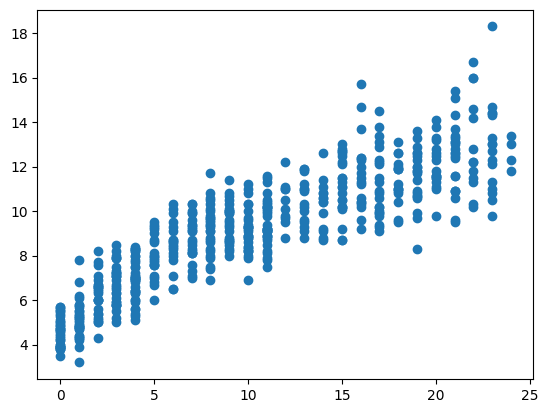

In [2]:
plt.scatter(dataDF['age'], dataDF['weight'])
print(dataDF.corr().iloc[0,1])

### Comments:
With a linear model, we are trying to predict the values of a variable based on the values of another variable, by fitting a linear equation to the training data. So, we assume that there is a linear relationship between the variables. Of course there are cases where this assumption is not reasonable, but a strong correlation between the two variables is a good indicator that the linear model will be a good fit, and therefore make good predictions. 
In this case, we got a correlation of approximately 0.88 between the age and weight of the children, which indicates that it is reasonable to use linear regression for our predictive model.

### **1.b)** Build a linear regression model and estimate the true error (5 out of 20) 

In [3]:
seed = 3
x = dataDF[['age']]
y = dataDF[['weight']]

# Define a train and test set
train_set, test_set = train_test_split(dataDF, test_size=0.2, random_state=seed)

train_x = train_set[['age']]
train_y = train_set[['weight']]
test_x = test_set[['age']]
test_y = test_set[['weight']]

# Build the linear regression model using the training data
model = linear_model.LinearRegression()
model.fit(train_x, train_y)

# Estimate true error, expressed as the negative mean squared error
estimator = linear_model.LinearRegression()
scores = cross_val_score(estimator, x, y, scoring='neg_mean_squared_error', cv=10)
print(scores.mean())

-1.636245443944943


### **1.c)** Display in a visualization the data used to build the model as well as the model obtained. Finally,  write the equation of the model obtained (2 out of 20) 

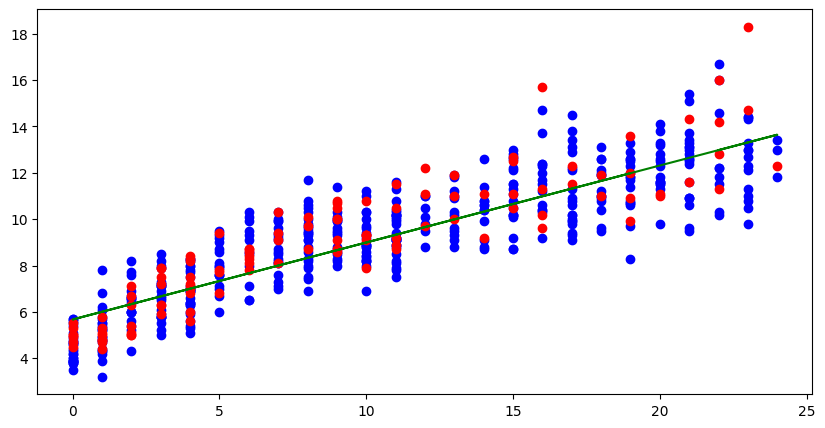

y = 0.3321117963898643 * age + 5.672550869806655


In [4]:
# Data used to build the model displayed in blue

plt.figure(figsize=(10,5))
plt.scatter(train_x, train_y, c='b')
plt.scatter(test_x, test_y, c='r')

train_yx = model.predict(train_x)
plt.plot(train_x, train_yx, c='g')

plt.show()

print('y = ' + str(model.coef_[0][0]) + " * age" + " + " +  str(model.intercept_[0]))

## Question 2 (10 points out of 20)

Here, we aim to find out if we can create a better model to predict the weigth of children based on their age.

### **2.a)** Evaluate polynomial model of degrees 1 through 10. What degree would you choose in order to have a better model when compared to the model built previously? Why? (7 out of 20)

In [5]:
def transform_data(degree):
    # Function transforms the data to the input for the specified degree
    poly_features = PolynomialFeatures(degree)
    poly_trans = poly_features.fit_transform(x)
    df_trans = pd.DataFrame(poly_trans)
    return df_trans

# Estimate error for degrees 1 to 10
estimator = linear_model.LinearRegression()
df = pd.DataFrame({'degree': range(1,11)})

df['test_error'] = df['degree'].apply(lambda x: cross_val_score(estimator, transform_data(x), y, scoring='neg_mean_squared_error', cv=10).mean())
display(df.set_index('degree'))

,test_error
degree,
1,-1.636245
2,-1.443860
3,-1.409529
4,-1.412721
5,-1.419276
6,-1.421643
7,-1.417251
8,-1.407285
9,-1.413365


### Comments:

The previous model (linear model with degree 1) had an error of approximately -1.64, which is the highest error of all the models we evaluated. Of course, as we increase the degree of the polynomial model, the less error we tend to obtain (indicated by values closer to zero). However, in order to choose the best model, minimizing error is not the only criteria, as the goal of a model is to predict for new data. So, a balance between low error but generalized model (and therefore low degree) is what we want to achieve.

In this case, we can see that the model with degree 3 has a very low error, being only slightly beaten by models with degree 8 and 10. So, implementing the logic stated above, we should choose the polynomial model with degree 3.

### **2.b)** Using the best polynomial degree, find the coefficients of the best curve (3 points out of 20)

In [8]:
degree = 3
polynomial_features = PolynomialFeatures(degree)

# Prepare the data and define the train and test sets
inputDF = transform_data(degree)
inputDF['y'] = y

train_set, test_set = train_test_split(inputDF, test_size = 0.2, random_state = seed)

train_x = train_set.iloc[:, 0:len(train_set.columns)-1]
train_y = train_set[['y']]

# Build the model using the training data
model = linear_model.LinearRegression()
model.fit(train_x, train_y)

# Use a loop to print the equation for the model
equation = 'y = '
for i in range(1, degree+1):
    equation += f"{model.coef_[0][i]} * age^{i} + "
equation += str(model.intercept_[0])
print(equation)

y = 0.7666392892822864 * age^1 + -0.033913007765631935 * age^2 + 0.0006973667216639834 * age^3 + 4.5828504778354535
